# Analysis of the Relationships between Salary and Performance in the Sales Department
dataset info:

Title: Human Resources Data Set

Dataset Source: Kaggle

Dataset URL: https://www.kaggle.com/datasets/rhuebner/human-resources-data-set

Date Accessed: October 5, 2023

In [1]:
# Importing py libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Processing dataset into a py dataframe
df = pd.read_csv('HRDataset_v14.csv')

In [3]:
# Emploratory Data Analysis (EDA)
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())

              Employee_Name  EmpID  MarriedID  MaritalStatusID  GenderID  \
0       Adinolfi, Wilson  K  10026          0                0         1   
1  Ait Sidi, Karthikeyan     10084          1                1         1   
2         Akinkuolie, Sarah  10196          1                1         0   
3              Alagbe,Trina  10088          1                1         0   
4          Anderson, Carol   10069          0                2         0   

   EmpStatusID  DeptID  PerfScoreID  FromDiversityJobFairID  Salary  ...  \
0            1       5            4                       0   62506  ...   
1            5       3            3                       0  104437  ...   
2            5       5            3                       0   64955  ...   
3            1       5            3                       0   64991  ...   
4            5       5            3                       0   50825  ...   

      ManagerName  ManagerID RecruitmentSource PerformanceScore  \
0  Michael Albert  

In [4]:
# Checking the list of department categories
unique_departments = list(df['Department'].unique())
print(unique_departments)

['Production       ', 'IT/IS', 'Software Engineering', 'Admin Offices', 'Sales', 'Executive Office']


In [5]:
# Transforming our performance score into a scale from 1 to 4
# Createing a dictionary to map PerformanceScore values to integers
performance_mapping = {
    "Exceeds": 4,
    "Fully Meets": 3,
    "Needs Improvement": 2,
    "PIP": 1
}

# Maping the values and creating a new column 'PerformanceScore_Int'
df['PerformanceScore_Int'] = df['PerformanceScore'].map(performance_mapping)

# Printing the two features to see the result
print(df[['PerformanceScore', 'PerformanceScore_Int']].head())

  PerformanceScore  PerformanceScore_Int
0          Exceeds                     4
1      Fully Meets                     3
2      Fully Meets                     3
3      Fully Meets                     3
4      Fully Meets                     3


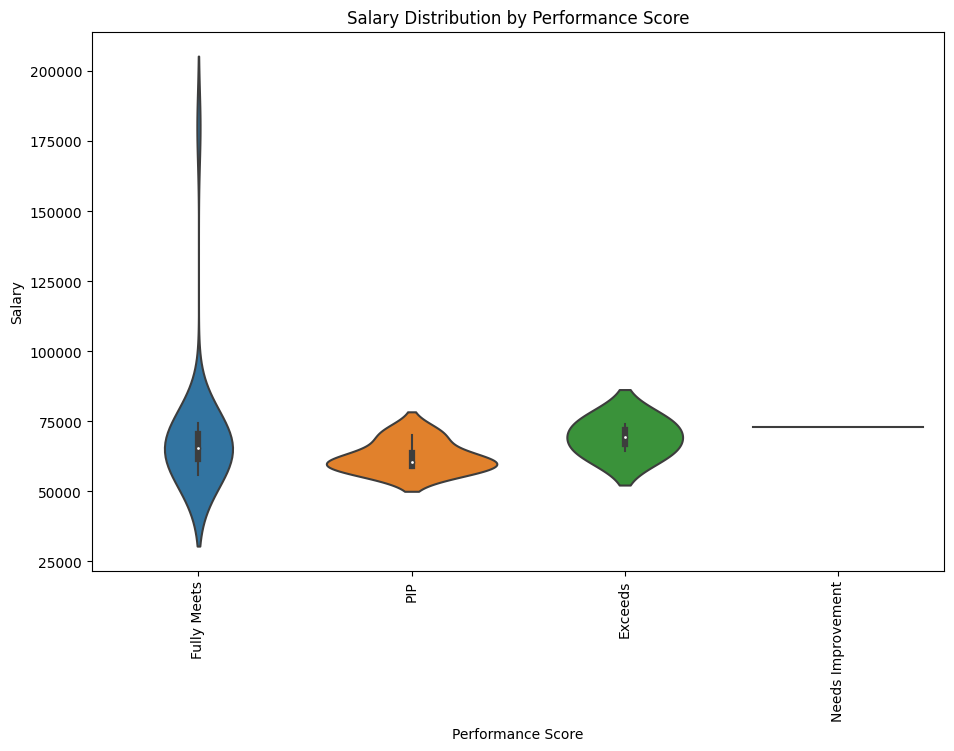

In [6]:
# Visualizing the relationship between salary and performance in the Sales Department using a Violin Plot

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

sales_df = df[df['Department'] == 'Sales']

plt.figure(figsize=(11, 7))
sns.violinplot(x=sales_df['PerformanceScore'], y=sales_df['Salary'], data=df)
plt.xlabel('Performance Score')
plt.ylabel('Salary')
plt.title('Salary Distribution by Performance Score')
plt.xticks(rotation=90)
plt.show()